In [1]:
# NOTE: POSSIBLE USE CASE FOR FUTURE GRAPHS, CREATE CSV FROM WEB SCRAPING AND THEN CREATE VISUALIZATIONS IN SEPERATE NOTEBOOKS
# !pip install bs4

In [2]:
!pip install scipy

In [3]:
from urllib.request import urlopen,Request
from bs4 import BeautifulSoup as BS #BeautifulSoup is a Python library
                                    #for pulling data out of HTML and XML files.

import urllib.request
import urllib.parse
import urllib.error
import ssl
import re
import pandas as pd
import json
from scipy.stats import pearsonr


def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
address=[]
rent=[]
bed=[]
descp=[]
addr_link=[]
urls = ["https://www.apartments.com/houses/new-york-ny/"]


for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        #print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'class':'price-range'}): #gets rent
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                rent.append(row)

        for tag in soup.findAll('div',attrs={'class':'property-address js-url'}): #gets add
                row = tag.get_text()
                #print(row)
                address.append(row)
               
       
               
        
               
        for tag in soup.findAll('div',attrs={'class':'bed-range'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                bed.append(row)
               
       
       
   
        count=count+1
        page=f'{count}'
        #page=str(count)+"/2"  # changes page,will go till page 4,total 120 links per city
        x=y+page
#data_frame = pd.DataFrame(list(zip(rent,bed,descp,addr_link)),columns=["Rent","Beds","Description","Address"])
data_frame=pd.DataFrame({'Address':address,'Rent':rent,'Bed':bed})




In [4]:
data_frame['Bed']=data_frame['Bed'].astype('str')
data_frame['Address']=data_frame['Address'].astype('str')

In [5]:
data_frame[['Bed','Baths']] = data_frame.Bed.apply(
    lambda x: pd.Series(str(x).split(',')))
data_frame[['Address','Borough']] = data_frame.Address.apply(
    lambda x: pd.Series(str(x).split('New York,')))

In [6]:
data_frame['Borough']=data_frame['Borough'].astype('str')
data_frame[['Borough','Zip']] = data_frame.Borough.apply(
    lambda x: pd.Series(str(x).split('NY')))

In [7]:
data_frame['Borough']='NY'

In [8]:
data_frame['Rent']= data_frame['Rent'].str.replace(r"$", "", regex=False)
data_frame['Rent']= data_frame['Rent'].str.replace(",", "", regex=False)
data_frame['Rent']= data_frame['Rent'].str.replace(r"/mo", "", regex=False)
data_frame['Bed']= data_frame['Bed'].str.replace("Beds", "", regex=False)
data_frame['Bed']= data_frame['Bed'].str.replace("Bed", "", regex=False)
data_frame['Baths']= data_frame['Baths'].str.replace("Bath", "", regex=False)
data_frame['Baths']= data_frame['Baths'].str.replace("Baths", "", regex=False)
data_frame['Baths']= data_frame['Baths'].str.replace("s", "", regex=False)
data_frame['Rent']=data_frame['Rent'].astype(int)
data_frame['Baths']=data_frame['Baths'].astype(float)

In [11]:
data_frame.to_csv('Manhatten_house_prices.csv')

In [12]:
def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
address=[]
rent=[]
bed=[]
descp=[]
addr_link=[]
urls = ["https://www.apartments.com/houses/bronx-ny/"]


for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        #print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'class':'price-range'}): #gets rent
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                rent.append(row)

        for tag in soup.findAll('div',attrs={'class':'property-address js-url'}): #gets add
                row = tag.get_text()
                #print(row)
                address.append(row)
               
       
               
        
               
        for tag in soup.findAll('div',attrs={'class':'bed-range'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                bed.append(row)
               
       
       
                                           

     
        count=count+1
        page=f'{count}'
        #page=str(count)+"/2"  # changes page,will go till page 4,total 120 links per city
        x=y+page
data_frame2=pd.DataFrame({'Address':address,'Rent':rent,'Bed':bed})



In [13]:
data_frame2['Bed']=data_frame2['Bed'].astype('str')
data_frame2['Address']=data_frame2['Address'].astype('str') 
data_frame2[['Bed','Baths']] = data_frame2.Bed.apply( 
    lambda x: pd.Series(str(x).split(',')))
data_frame2[['Address','Borough']] = data_frame2.Address.apply(
    lambda x: pd.Series(str(x).split(', NY')))
data_frame2['Borough']=data_frame2['Borough'].astype('str') 
data_frame2['Zip']=data_frame2['Borough'].astype(int)
data_frame2['Borough']='The Bronx'

In [15]:
data_frame2['Rent']= data_frame2['Rent'].str.replace(r"$", "", regex=False)
data_frame2['Rent']= data_frame2['Rent'].str.replace(",", "", regex=False)
data_frame2['Address']= data_frame2['Address'].str.replace("The", "", regex=False)
data_frame2['Address']= data_frame2['Address'].str.replace("Bronx", "", regex=False)
data_frame2['Rent']= data_frame2['Rent'].str.replace(r"/mo", "", regex=False)
data_frame2['Bed']= data_frame2['Bed'].str.replace("Beds", "", regex=False)
data_frame2['Bed']= data_frame2['Bed'].str.replace("Bed", "", regex=False)
data_frame2['Baths']= data_frame2['Baths'].str.replace("Bath", "", regex=False)
data_frame2['Baths']= data_frame2['Baths'].str.replace("Baths", "", regex=False)
data_frame2['Baths']= data_frame2['Baths'].str.replace("s", "", regex=False)
data_frame2['Rent']=data_frame2['Rent'].astype(int)
data_frame2['Baths']=data_frame2['Baths'].astype(float)

In [16]:
data_frame2.to_csv('Bronx_house_prices.csv')

In [17]:
def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
address=[]
rent=[]
bed=[]
descp=[]
addr_link=[]
urls = ["https://www.apartments.com/houses/queens-ny/2/"]


for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        #print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'class':'price-range'}): #gets rent
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                rent.append(row)

        for tag in soup.findAll('div',attrs={'class':'property-address js-url'}): #gets add
                row = tag.get_text()
                #print(row)
                address.append(row)
               
       
               
        
               
        for tag in soup.findAll('div',attrs={'class':'bed-range'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                bed.append(row)
               
       
       
                                           

        count=count+1
        page=f'{count}'
        #page=str(count)+"/2"  # changes page,will go till page 4,total 120 links per city
        x=y+page
data_frame3=pd.DataFrame({'Address':address,'Rent':rent,'Bed':bed})



In [18]:
data_frame3['Bed']=data_frame3['Bed'].astype('str')
data_frame3['Address']=data_frame3['Address'].astype('str')
data_frame3[['Bed','Baths']] = data_frame3.Bed.apply( 
    lambda x: pd.Series(str(x).split(',')))
data_frame3[['Address','Borough']] = data_frame3.Address.apply(
    lambda x: pd.Series(str(x).split('Queens,')))
data_frame3['Borough']=data_frame3['Borough'].astype('str')
data_frame3[['Borough','Zip']] = data_frame3.Borough.apply(
    lambda x: pd.Series(str(x).split('NY')))
data_frame3['Borough']='Queens'

In [19]:
data_frame3['Rent']= data_frame3['Rent'].str.replace(r"$", "", regex=False)
data_frame3['Rent']= data_frame3['Rent'].str.replace(",", "", regex=False)
data_frame3['Rent']= data_frame3['Rent'].str.replace(r"/mo", "", regex=False)
data_frame3['Bed']= data_frame3['Bed'].str.replace("Beds", "", regex=False)
data_frame3['Bed']= data_frame3['Bed'].str.replace("Bed", "", regex=False)
data_frame3['Baths']= data_frame3['Baths'].str.replace("Bath", "", regex=False)
data_frame3['Baths']= data_frame3['Baths'].str.replace("Baths", "", regex=False)
data_frame3['Baths']= data_frame3['Baths'].str.replace("s", "", regex=False)
data_frame3['Rent']=data_frame3['Rent'].astype(int)
data_frame3['Baths']=data_frame3['Baths'].astype(float)

In [20]:
data_frame3.to_csv('Queens_house_prices.csv')

In [21]:
def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
address=[]
rent=[]
bed=[]
descp=[]
addr_link=[]
urls = ["https://www.apartments.com/houses/staten-island-ny/"]


for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        #print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'class':'price-range'}): #gets rent
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                rent.append(row)

        for tag in soup.findAll('div',attrs={'class':'property-address js-url'}): #gets add
                row = tag.get_text()
                #print(row)
                address.append(row)
               
       
               
        
               
        for tag in soup.findAll('div',attrs={'class':'bed-range'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                bed.append(row)
               
       
       
                                        
        count=count+1
        page=f'{count}'
        #page=str(count)+"/2"  # changes page,will go till page 4,total 120 links per city
        x=y+page
data_frame4=pd.DataFrame({'Address':address,'Rent':rent,'Bed':bed})


In [22]:
data_frame4['Bed']=data_frame4['Bed'].astype('str')
data_frame4['Address']=data_frame4['Address'].astype('str') 
data_frame4[['Bed','Baths']] = data_frame4.Bed.apply( 
    lambda x: pd.Series(str(x).split(',')))
data_frame4[['Address','Borough']] = data_frame4.Address.apply(
    lambda x: pd.Series(str(x).split('Staten Island,')))
data_frame4['Borough']=data_frame4['Borough'].astype('str')
data_frame4[['Borough','Zip']] = data_frame4.Borough.apply(
    lambda x: pd.Series(str(x).split('NY')))
data_frame4['Borough']='Staten Island'

In [23]:
data_frame4['Rent']= data_frame4['Rent'].str.replace(r"$", "", regex=False)
data_frame4['Rent']= data_frame4['Rent'].str.replace(",", "", regex=False)
data_frame4['Rent']= data_frame4['Rent'].str.replace(r"/mo", "", regex=False)
data_frame4['Bed']= data_frame4['Bed'].str.replace("Beds", "", regex=False)
data_frame4['Bed']= data_frame4['Bed'].str.replace("Bed", "", regex=False)
data_frame4['Baths']= data_frame4['Baths'].str.replace("Bath", "", regex=False)
data_frame4['Baths']= data_frame4['Baths'].str.replace("Baths", "", regex=False)
data_frame4['Baths']= data_frame4['Baths'].str.replace("s", "", regex=False)
data_frame4['Rent']=data_frame4['Rent'].astype(int)
data_frame4['Baths']=data_frame4['Baths'].astype(float)

In [24]:
data_frame4.to_csv('Staten_Island_house_prices.csv')

In [25]:
def get_headers():
    #Headers
    headers={'accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
            'accept-language':'en-US,en;q=0.9',
            'cache-control':'max-age=0',
            'upgrade-insecure-requests':'1',
            'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.122 Safari/537.36'}

    return headers


ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE
count=1 # for pagination
address=[]
rent=[]
bed=[]
descp=[]
addr_link=[]
urls = ["https://www.apartments.com/houses/brooklyn-ny/2/"]


for x in urls:
    count=1
    y=x
    while(count < 5):  # will go till 4 pages
        #print(x)
        req = Request(x, headers=get_headers())  #req all headers
        htmlfile = urlopen(req)
        htmltext = htmlfile.read()
        #print (htmltext)
        soup = BS(htmltext,'html.parser')
        #print (soup.prettify())
       
        for tag in soup.findAll('div',attrs={'class':'price-range'}): #gets rent
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                rent.append(row)

        for tag in soup.findAll('div',attrs={'class':'property-address js-url'}): #gets add
                row = tag.get_text()
                #print(row)
                address.append(row)
               
       
               
        
               
        for tag in soup.findAll('div',attrs={'class':'bed-range'}): #bed
                row = tag.get_text()
                if not row:
                    row="NA"
               # print(row)
                bed.append(row)
               
       
      
        count=count+1
        page=f'{count}'
        #page=str(count)+"/2"  # changes page,will go till page 4,total 120 links per city
        x=y+page
data_frame5=pd.DataFrame({'Address':address,'Rent':rent,'Bed':bed})


In [26]:
data_frame5['Bed']=data_frame5['Bed'].astype('str')
data_frame5['Address']=data_frame5['Address'].astype('str') 
data_frame5[['Bed','Baths']] = data_frame5.Bed.apply( 
    lambda x: pd.Series(str(x).split(',')))
data_frame5[['Address','Borough']] = data_frame5.Address.apply(
    lambda x: pd.Series(str(x).split('Brooklyn,')))
data_frame5['Borough']=data_frame5['Borough'].astype('str')
data_frame5[['Address','Zip']] = data_frame5.Address.apply(
    lambda x: pd.Series(str(x).split('NY')))
data_frame5.Address.str.split(" ")
data_frame5[['Borough','Zip']] = data_frame5.Borough.apply(
    lambda x: pd.Series(str(x).split('NY ')))
data_frame5['Borough']='Brooklyn'

In [27]:
data_frame5['Rent']= data_frame5['Rent'].str.replace(r"$", "", regex=False)
data_frame5['Rent']= data_frame5['Rent'].str.replace(",", "", regex=False)
data_frame5['Rent']= data_frame5['Rent'].str.replace(r"/mo", "", regex=False)
data_frame5['Bed']= data_frame5['Bed'].str.replace("Beds", "", regex=False)
data_frame5['Bed']= data_frame5['Bed'].str.replace("Bed", "", regex=False)
data_frame5['Baths']= data_frame5['Baths'].str.replace("Bath", "", regex=False)
data_frame5['Baths']= data_frame5['Baths'].str.replace("Baths", "", regex=False)
data_frame5['Baths']= data_frame5['Baths'].str.replace("s", "", regex=False)
data_frame5['Rent']=data_frame5['Rent'].astype(int)
data_frame5['Baths']=data_frame5['Baths'].astype(float)

In [28]:
data_frame5.to_csv('Brooklyn_house_prices.csv')

In [29]:
df_combined = pd.concat([data_frame, data_frame2,data_frame3,data_frame4,data_frame5], ignore_index=True)

In [30]:
invalid_address=df_combined.loc[df_combined['Address'].str.contains('New York|Queens|Brooklyn|Staten Island|The Bronx')]
invalid_address

,Address,Rent,Bed,Baths,Borough,Zip
82,4 Hamilton Terrace New York,13500,4,4.0,The Bronx,10031
83,614 W 148th St New York,2200,Studio,1.0,The Bronx,10031
89,563 W 144th St New York,3000,3,1.0,The Bronx,10031
93,329 E 116th St New York,2400,3,1.0,The Bronx,10029
97,1469 5th Ave New York,3000,3,1.0,The Bronx,10035
99,157 E 116th St New York,1700,1,1.0,The Bronx,10029
115,148 W 132nd St New York,10950,5,5.0,The Bronx,10027
129,158-40 Powells Cove Blvd Queens,2100,2,1.0,The Bronx,11357
141,4 Hamilton Terrace New York,13500,4,4.0,The Bronx,10031
142,614 W 148th St New York,2200,Studio,1.0,The Bronx,10031


In [31]:
invalid_address.Address.to_list()

['4 Hamilton Terrace New York',
 '614 W 148th St New York',
 '563 W 144th St New York',
 '329 E 116th St New York',
 '1469 5th Ave New York',
 '157 E 116th St New York',
 '148 W 132nd St New York',
 '158-40 Powells Cove Blvd Queens',
 '4 Hamilton Terrace New York',
 '614 W 148th St New York',
 '563 W 144th St New York',
 '329 E 116th St New York',
 '1469 5th Ave New York',
 '157 E 116th St New York',
 '0 Sunnyside Ave Brooklyn, NY 11207',
 '896 New York Ave ',
 '852 Cypress Ave Queens, ',
 '301 E 21st St New York, ']

In [35]:
corrected_address={'25 Adrian Ave New York':'25 Adrian Ave',
 '563 W 144th St New York':'563 W 144th St',
 '4 Hamilton Terrace New York':'4 Hamilton Terrace',
 '329 E 116th St New York':'329 E 166th St',
 '614 W 148th St New York':'614 W 148th St',
 '1469 5th Ave New York':'1469 5th Ave',
 '148 W 132nd St New York':'148 W 132nd St',
 '154-37 Riverside Dr Queens':'154-37 Riverside Dr',
 '158-40 Powells Cove Blvd Queens':'158-40 Powells Cove Blvd',
 '0 Sunnyside Ave Brooklyn, NY 11207':'0 Sunnyside Ave',
 '852 Cypress Ave Queens, NY 11385':'852 Cypress Ave',
 '301 E 21st St New York, NY 10010':'301 E 21st St',
 '157 E 116th St New York':'157 E 116th St'}


In [36]:
df_combined=df_combined.replace(corrected_address)

In [37]:
invalid_address=df_combined.loc[df_combined['Address'].str.contains('New York|Queens|Brooklyn|Staten Island|The Bronx')]
invalid_address

,Address,Rent,Bed,Baths,Borough,Zip
237,896 New York Ave,2000,Studio,1.0,Brooklyn,11203
256,"852 Cypress Ave Queens,",2875,Studio,1.0,Brooklyn,NaN
257,"301 E 21st St New York,",3900,1,1.0,Brooklyn,NaN


In [38]:
df_combined['Borough']=df_combined['Borough'].replace('NY','Manhattan')

In [39]:
df_combined=df_combined[df_combined['Address']!='301 E 21st St New York, ']

In [40]:
df_combined=df_combined.drop_duplicates(subset=['Address','Zip'])

In [41]:
df_combined[df_combined['Zip'].isna()]

,Address,Rent,Bed,Baths,Borough,Zip
74,"185 Lenox Ave NewYorkCity, NY 10026",3090,1,1.0,Manhattan,NaN
161,"118-01 Sutphin Blvd Jamaica, NY 11436",2800,1,1.0,Queens,NaN
162,0 Sunnyside Ave,4800,4,3.0,Queens,NaN
256,"852 Cypress Ave Queens,",2875,Studio,1.0,Brooklyn,NaN


In [42]:
df_combined=df_combined[df_combined['Address']!='185 Lenox Ave NewYorkCity,NY']

df_combined=df_combined[df_combined['Address']!='118-01 Sutphin Blvd Jamaica,NY ']

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

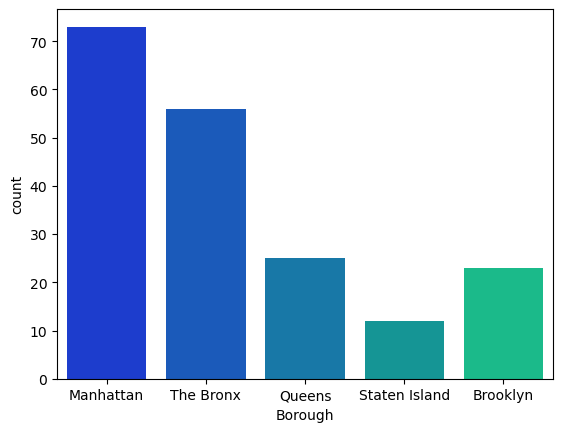

In [44]:
sns.countplot(x='Borough', data=df_combined, palette='winter')
plt.show()

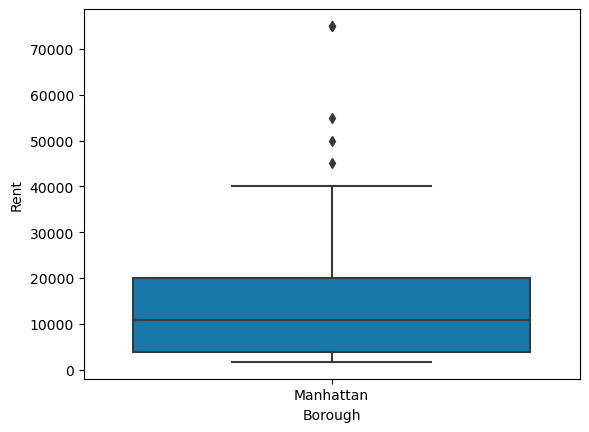

In [57]:
sns.boxplot(x='Borough', y='Rent', data=df_combined[df_combined['Borough']=='Manhattan'], palette='winter')
plt.show()

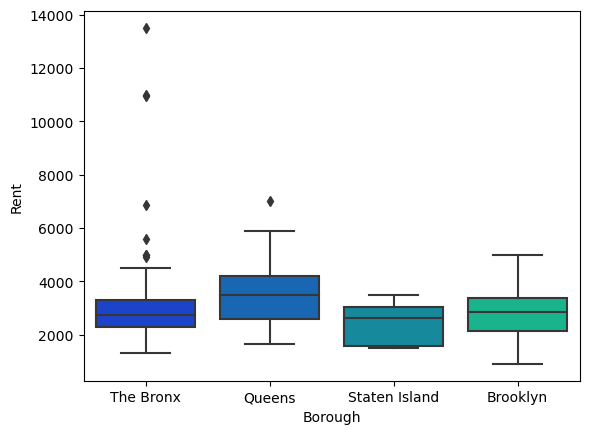

In [58]:
sns.boxplot(x='Borough', y='Rent', data=df_combined[df_combined['Borough']!='Manhattan'], palette='winter')
plt.show()